## Bike Sharing Assignment - Multiple Linear Regression Model 

### Problem Statement

The company wants to know the factors on which the demand for these shared bikes depends based on :

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

### Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bike = pd.read_csv("day.csv")

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# find any missing values in the dataset
bike.isnull().values.sum()

0

These are no null values in the dataset

In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation

In [9]:
# Change dteday to datetime format

bike['dteday'] = bike['dteday'].astype('datetime64')

In [10]:
bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
# Change 'season' column into categories

varlist =  ['season']

# Defining the map function
def map1(x):
    return x.map({1: 'spring', 2: 'summer',3: 'fall',4: 'winter'})

# Applying the function to the season list
bike[varlist] = bike[varlist].apply(map1)

In [12]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
# Change 'weather' column into categories

varlist =  ['weathersit']

# Defining the map function
def map2(x):
    return x.map({1: 'Clear', 2: 'Mist',3: 'Light',4: 'Rainy'})

# Applying the function to the weather list
bike[varlist] = bike[varlist].apply(map2)

In [14]:
bike['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [15]:
# Change 'Month' column into categories

varlist =  ['mnth']

# Defining the map function
def map3(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Applying the function to the month list
bike[varlist] = bike[varlist].apply(map3)

In [16]:
bike['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [17]:
# Change 'Weekday' column into categories

varlist =  ['weekday']

# Defining the map function
def map4(x):
    return x.map({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

# Applying the function to the weekday list
bike[varlist] = bike[varlist].apply(map4)

In [18]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


By looking at the dataset, the dependent variable seems to be casual, registered and cnt. 
But cnt is the summation of causal and registered, so we can take cnt into account for model building

### Data Visualization

#### Data Visualization for individual Variables

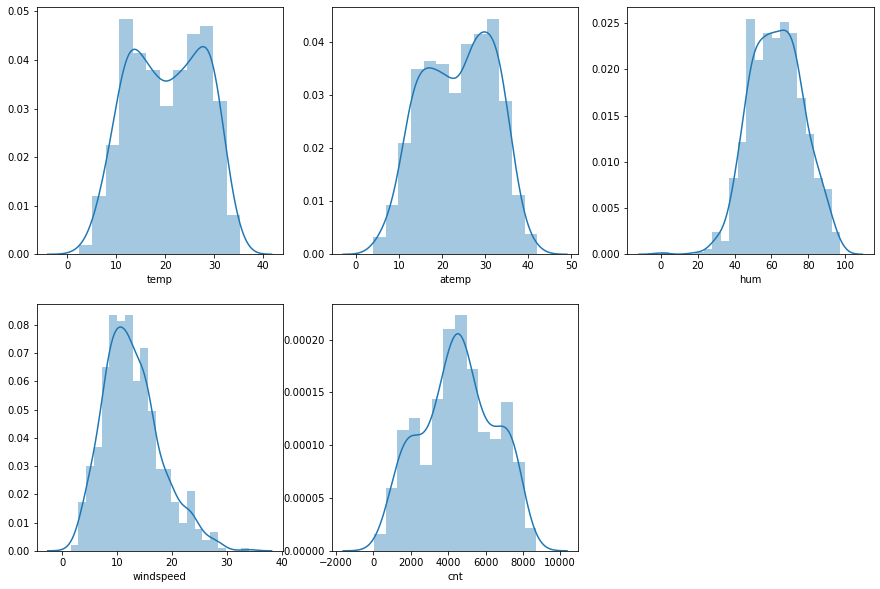

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.distplot(bike['temp'])
plt.subplot(2,3,2)
sns.distplot(bike['atemp'])
plt.subplot(2,3,3)
sns.distplot(bike['hum'])
plt.subplot(2,3,4)
sns.distplot(bike['windspeed'])
plt.subplot(2,3,5)
sns.distplot(bike['cnt'])
plt.show()

##### Observation
By analyzing on the individual variables, there is increase in bike riders during
- temp and atemp seems to have similar pattern where there are two peaks ranging from approx. 10-30 degree celcius
- hum has peak range approx. at 45-65
- windspeed has peak range approx. at 10
- cnt has peak range approx. at 4000

#### Data Visualization for Numerical Variables

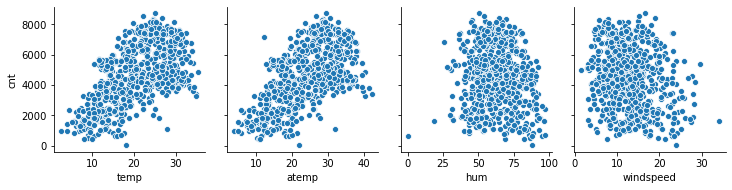

In [20]:
sns.pairplot(bike, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt')
plt.show()

##### Observation
- temp and atemp seems to have similar pattern. Seems to be like linear regression pattern
- hum has dense pattern after 50
- windspeed has dense pattern at center
- temp, atemp, hum and windspeed are continuous variables

#### Data Visualization for Categorical Variables

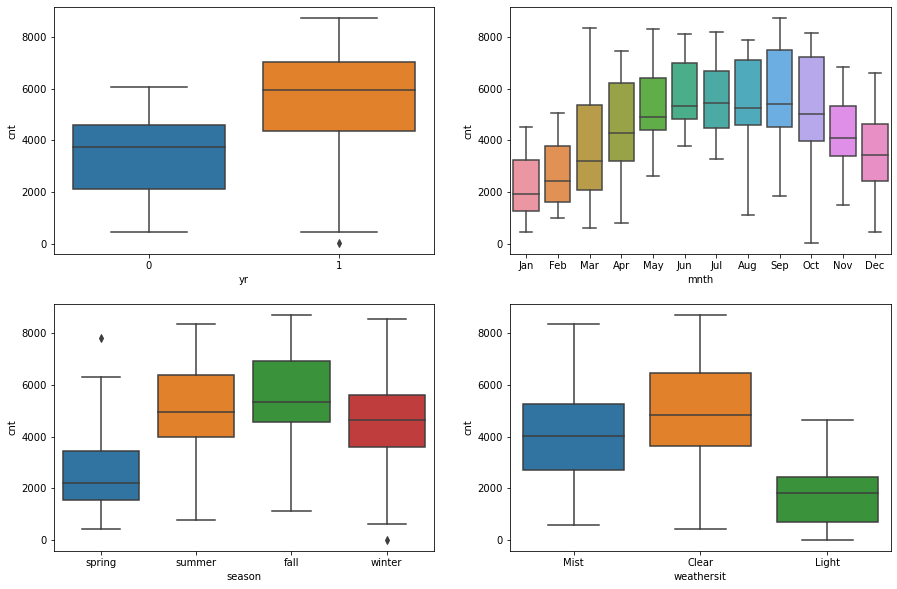

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

##### Observation
1. yr - 2019 is "1" and 2018 is ""0  which is marked as "0"
    - the year 2019 has more number of bike riders than the year 2018
2. month 
    - For more riders September is first and next comes March and May. Then followed by June,July and October
3. season 
    - season fall has more number of bike riders followed by winter and summer 
4. weathersit 
    - clear clouds had more number of bike riders followed by Misty. There is no records pertaining to Rainy weather in this data

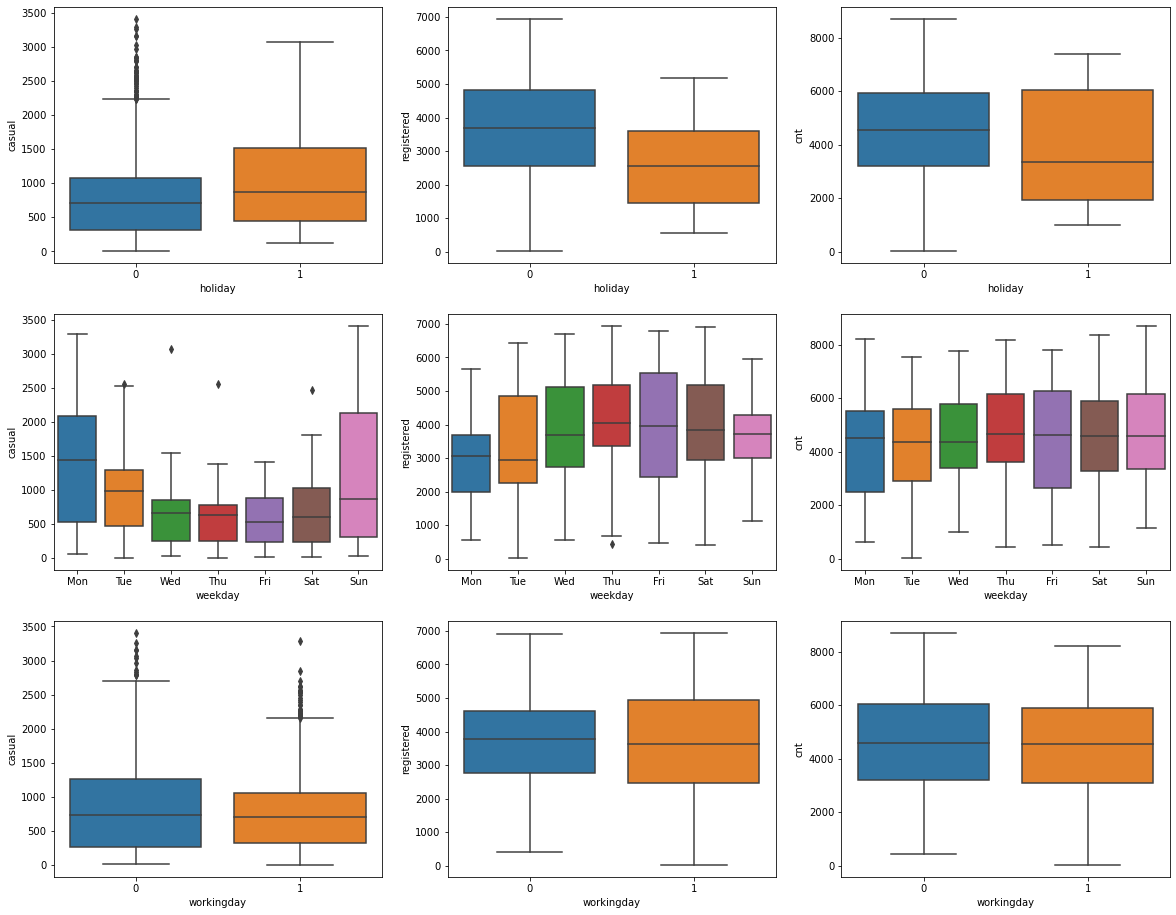

In [22]:
plt.figure(figsize=(20,16))
plt.subplot(3,3,1)
sns.boxplot(x = 'holiday', y = 'casual', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'registered', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'casual', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'registered', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'casual', data = bike)
plt.subplot(3,3,8)
sns.boxplot(x = 'workingday', y = 'registered', data = bike)
plt.subplot(3,3,9)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

##### Observation
1. holiday - Government Holiday is "1" and others "0"
    - casual has more riders on holiday whereas registered and total count have more riders on other days
    - there are some outliers in holiday with respect to casual on the category "0"
2. weekday 
    - casual has more riders on Sunday and Monday whereas registered has less riders on Sunday and Monday and total count have       riders on all the days
    - there are some outliers in weekday with respect to casual on the categories Tue, Wed, Thu and Sat
3. workingday - Workday is "1" and either weekend or holiday is "0"
    - casual and total count have more riders on holidays whereas registered has approx. equal riders on all days
    - there are some outliers in workingday with respect to casual on both the category "0" and "1"

##### dteday seems to be redundant as it is split into yr,mnth, weekday and instant is just a serial number so droppping them both

In [23]:
bike.drop(['instant','dteday'], axis = 1, inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### As cnt is the summation of causal and registered, so we can take "cnt" into account for model building and drop casual and registered

In [24]:
bike.drop(['casual','registered'], axis = 1, inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
bike.shape

(730, 12)

### Dummy Variables

In [26]:
bike_cat = ['season','mnth','weekday','weathersit']

In [27]:
# Get the dummy variables for the feature variable 'season','mnth','weekday','weathersit' and store it in a new variable - 'bike_dummy'
bike_dummy = pd.get_dummies(bike[bike_cat], drop_first = True)
bike_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
bike = pd.concat([bike, bike_dummy], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Drop the original columns as dummies are created for these columns
bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
bike.shape

(730, 30)

### Heatmap

In [31]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   season_spring     730 non-null    uint8  
 9   season_summer     730 non-null    uint8  
 10  season_winter     730 non-null    uint8  
 11  mnth_Aug          730 non-null    uint8  
 12  mnth_Dec          730 non-null    uint8  
 13  mnth_Feb          730 non-null    uint8  
 14  mnth_Jan          730 non-null    uint8  
 15  mnth_Jul          730 non-null    uint8  
 16  mnth_Jun          730 non-null    uint8  
 1

In [32]:
bike_numeric = bike.select_dtypes(include=['int64','float64'])

In [33]:
bike_numeric.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
corr = bike_numeric.corr()
corr

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


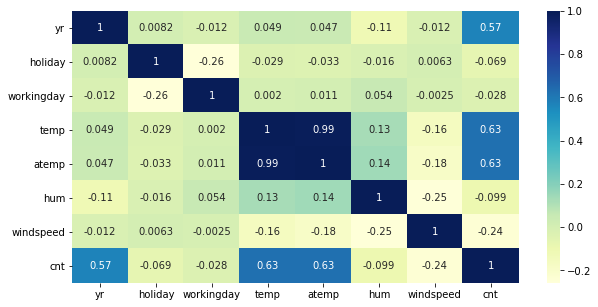

In [35]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 5))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

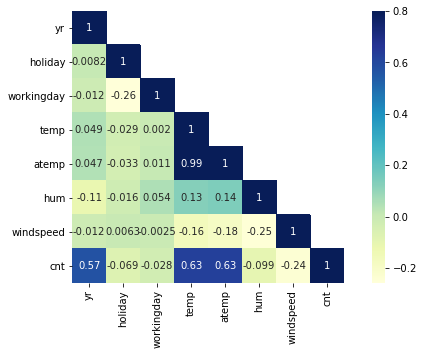

In [36]:
mask = np.array(corr)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corr, mask=mask, vmax=0.8, square=True, annot=True, cmap="YlGnBu")
plt.show()

In [37]:
# temp and atemp are highly correlated so dropping atemp
bike.drop('atemp',axis=1,inplace=True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [38]:
# import library for train-test split
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


### Rescaling the Features

In [40]:
# import library for scaling
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [43]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
653,1,0,1,-0.121335,-0.514725,-0.117752,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,1.231731,0.516433,-0.330615,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,-0.420478,-0.069854,-0.385694,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,-1.294913,-1.045032,2.018143,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,-0.627580,-1.000840,-0.779889,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1


#### Dividing into X and Y sets for the model building

In [44]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### Building a linear model

### RFE - Recursive Feature Elimination

In [45]:
# import RFE and LinearRegression library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE with columns
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', False, 6),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 4),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10),
 ('weathersit_Light', True, 1),
 ('weathersit_Mist', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light', 'weathersit_Mist'],
      dtype='object')

##### Above are the columns selected using RFE for model building

In [49]:
X_train.columns[~rfe.support_]

Index(['workingday', 'hum', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

##### Above are the columns not selected using RFE

### Building model using statsmodel, for the detailed statistics

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Light,weathersit_Mist
653,1,0,-0.121335,-0.117752,0,0,1,0,0,0,0,0,0,0,0
576,1,0,1.231731,-0.330615,0,0,0,0,0,0,1,0,0,0,0
426,1,0,-0.420478,-0.385694,1,0,0,0,0,0,0,0,0,0,1
728,1,0,-1.294913,2.018143,1,0,0,1,0,0,0,0,0,0,0
482,1,0,-0.627580,-0.779889,0,1,0,0,0,0,0,0,0,0,1


#### Initial Model after RFE


In [51]:
# import statsmodel for model building and statistical evaluation

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [52]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe1).fit()   

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.55e-186
Time:                        12:18:15   Log-Likelihood:                -4118.5
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     494   BIC:                             8337.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3803.8999    131.676  

In [54]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,season_spring,3.77
2,temp,2.86
6,season_winter,2.64
9,mnth_Jan,2.45
0,yr,1.96
8,mnth_Feb,1.94
11,mnth_Nov,1.86
7,mnth_Dec,1.66
14,weathersit_Mist,1.52
10,mnth_Jul,1.40


##### Obervation : p-value for mnth_Feb is high (>0.05)  and VIF seems to be under limit for the variables. Drop the varaible 'mnth_Feb' and rebuild the model

#### Iteration 1

In [55]:
X_train_new = X_train_rfe.drop(["mnth_Feb"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# printing summary 
print(lm.summary())

# printing the columns
print ('\n\n X_train_new.columns \n\n', X_train_new.columns)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print('\n\n VIF \n\n',vif)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.57e-186
Time:                        12:18:15   Log-Likelihood:                -4120.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3767.3679    130.348  

##### Now p-value and VIF are under limit (i.e) p-value is less than 0.05 and VIF is less than 5, so let us proceed with further steps 

### Residual Analysis on the training data

In [56]:
y_train_pred = lm.predict(X_train_lm)

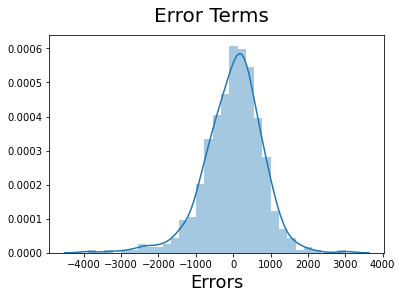

In [57]:
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

##### Observation : error terms are normally distributed with its mean at 0

### Making Predictions Using the Final Model

Applying the scaling on the test sets

In [58]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [60]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
184,0,1,0,1.305371,0.047995,-1.394498,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,1.613721,-0.276087,-0.984730,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,-0.112129,1.285378,0.079219,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,1.526280,-1.463381,0.110839,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,1.240938,-2.305983,1.277165,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [62]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [63]:
X_test_new.head()

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Light,weathersit_Mist
184,1.0,0,1,1.305371,-1.394498,0,0,0,0,0,1,0,0,0,1
535,1.0,1,0,1.613721,-0.984730,0,1,0,0,0,0,0,0,0,0
299,1.0,0,0,-0.112129,0.079219,0,0,1,0,0,0,0,0,0,1
221,1.0,0,0,1.526280,0.110839,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1.240938,1.277165,0,1,0,0,0,0,0,0,0,0


In [64]:
X_test_new.shape

(219, 15)

In [65]:
X_train_lm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Light,weathersit_Mist
653,1.0,1,0,-0.121335,-0.117752,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1.231731,-0.330615,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,-0.420478,-0.385694,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,-1.294913,2.018143,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,-0.627580,-0.779889,0,1,0,0,0,0,0,0,0,1


In [66]:
X_train_lm.shape

(510, 15)

In [67]:
y_test_pred = lm.predict(X_test_new)

#### Model Evaluation

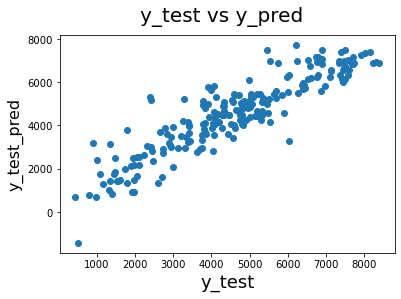

In [68]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

#### R2 Score

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8132736736429251

In [71]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8398671054755011

##### Observation :  R squared value on training and test is with +/- 5% tolerance which is good

#### R squared and Adjusted R squared for training dataset

In [72]:
SS_Residual = sum((y_train-y_train_pred)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train_lm.shape[1]-1)
print('r_squared for training dataset  :', r_squared)
print('adjusted_squared for training dataset :', adjusted_r_squared)

r_squared for training dataset  : 0.8398671054755008
adjusted_squared for training dataset : 0.835004770621518


#### R squared and Adjusted R squared for test dataset

In [73]:
SS_Residual1 = sum((y_test-y_test_pred)**2)
SS_Total1 = sum((y_test-np.mean(y_test))**2)
r_squared1 = 1 - (float(SS_Residual1))/SS_Total1
adjusted_r_squared1 = 1 - (1-r_squared1)*(len(y_test)-1)/(len(y_test)-X_test_new.shape[1]-1)
print('r_squared for test dataset  :', r_squared1)
print('adjusted_squared for test dataset :', adjusted_r_squared1)

r_squared for test dataset  : 0.8132736736429251
adjusted_squared for test dataset : 0.7994761618431413


#### MSE and RMSE 

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
print('mean squared error for training dataset  :', mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print('root mean squared error for training dataset  :', mean_squared_error(y_true=y_train,y_pred=y_train_pred, squared=False))

mean squared error for training dataset  : 609057.6725841988
root mean squared error for training dataset  : 780.4214711194194


In [76]:
print('mean squared error for test dataset  :', mean_squared_error(y_true=y_test,y_pred=y_test_pred))
print('root mean squared error for test dataset  :', mean_squared_error(y_true=y_test,y_pred=y_test_pred, squared=False))

mean squared error for test dataset  : 670039.2903421624
root mean squared error for test dataset  : 818.5592772317484


### Factors affecting the demand for these shared bikes 

#### Which variables are significant in predicting the demand for shared bikes.
-  year, temperature, season Winter, month September, season Summer, Windspeed, month November, December, January, July, season Spring, weather Mist, holiday, weather Light - these varaibles are significant in predicting the demand for shared bikes 


#### How well those variables describe the bike demands
- year, temperature, season Winter, month September, season Summer have positive co-efficients and these factors can go well with demand

### Equation of the best fitted line 

##### As per general equation  y = m1X1 + m2X2 + m3X3 + ... + mnXn + C
cnt = (2036.42 * yr) + (-798.93 * holiday) + (858.29 * temp) + (-233.84 * windspeed) + (-622.7 * season_spring) + 
(289.19 * season_summer) + 
(770.57 * season_winter) + (-387.05 * mnth_Dec) + (-436.95 * mnth_Jan) + (-437.87 * mnth_Jul) + 
(-363.78 * mnth_Nov) + (592.96 * mnth_Sep) + 
(-2545.82 * weathersit_Light) + (-707.9 * weathersit_Mist) + 3767.37